<a href="https://colab.research.google.com/github/ShvetsAlla/repo1/blob/main/%D0%B0%D0%BD%D0%B0%D0%BB%D1%96%D0%B7_%D1%80%D0%B5%D0%B7%D1%83%D0%BB%D1%8C%D1%82%D0%B0%D1%82%D1%96%D0%B2_A_B_%D1%82%D0%B5%D1%81%D1%82%D1%83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Product Analyst Test Task Data [Ver 2] – копія - Task 1.csv to Product Analyst Test Task Data [Ver 2] – копія - Task 1.csv


In [ ]:
import pandas as pd

# Завантаження CSV-файлу
data = pd.read_csv('Product Analyst Test Task Data [Ver 2] – копія - Task 1.csv')

# Перевірка перших рядків даних
print(data.head())


                            user_id install_date country test_group  trial  \
0  0000dd3fa4702a63d1b76aaffe1ab39b   2023-06-05      US  treatment      0   
1  0001f27ab7e22228e54c8b2028b43f24   2023-06-07      AU  treatment      0   
2  0006c5c547801308b36ea3cf669856ae   2023-06-07      AU  treatment      0   
3  000d1a300263c5db91cbefa3852898a7   2023-06-07      AU    control      0   
4  000e5e62e8746e467ed9f49ac5de3208   2023-06-06      US  treatment      0   

   paid subscription_name  revenue_1m  
0     0               NaN         0.0  
1     0               NaN         0.0  
2     0               NaN         0.0  
3     0               NaN         0.0  
4     0               NaN         0.0  


In [ ]:
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15285 entries, 0 to 15284
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            15285 non-null  object 
 1   install_date       15285 non-null  object 
 2   country            15285 non-null  object 
 3   test_group         15285 non-null  object 
 4   trial              15285 non-null  int64  
 5   paid               15285 non-null  int64  
 6   subscription_name  1723 non-null   object 
 7   revenue_1m         15285 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 955.4+ KB
None
              trial          paid    revenue_1m
count  15285.000000  15285.000000  15285.000000
mean       0.112725      0.017337      0.097297
std        0.316267      0.130529      0.782339
min        0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000
50%        0.000000      0.000000      0.000000
75%    

In [ ]:
data = data.dropna(subset=['test_group', 'trial', 'paid', 'revenue_1m'])


In [ ]:
# Підрахунок кількості користувачів у кожній групі
print(data['test_group'].value_counts())


test_group
treatment    7658
control      7627
Name: count, dtype: int64


In [ ]:
#Відсоток користувачів, що оформили пробний період
trial_conversion = data.groupby('test_group')['trial'].mean() * 100
print(trial_conversion)


test_group
control      12.127966
treatment    10.420475
Name: trial, dtype: float64


In [ ]:
#Відсоток користувачів, що зробили покупку після пробного періоду
paid_conversion = data[data['trial'] == 1].groupby('test_group')['paid'].mean() * 100
print(paid_conversion)


test_group
control      12.540541
treatment    18.671679
Name: paid, dtype: float64


In [ ]:
#Середній дохід на користувача
average_revenue = data.groupby('test_group')['revenue_1m'].mean()
print(average_revenue)


test_group
control      0.091103
treatment    0.103467
Name: revenue_1m, dtype: float64


In [38]:
#t-тест для перевірки, чи є відмінності між групами статистично значущими
from scipy import stats

control_revenue = data[data['test_group'] == 'control']['revenue_1m']
treatment_revenue = data[data['test_group'] == 'treatment']['revenue_1m']

t_stat, p_value = stats.ttest_ind(control_revenue, treatment_revenue, nan_policy='omit')
print(f"T-test result: t-stat = {t_stat:.2f}, p-value = {p_value:.4f}")


T-test result: t-stat = -0.98, p-value = 0.3286


<ipython-input-39-2f7bb037f1fb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=trial_conversion.index, y=trial_conversion.values, palette='viridis')


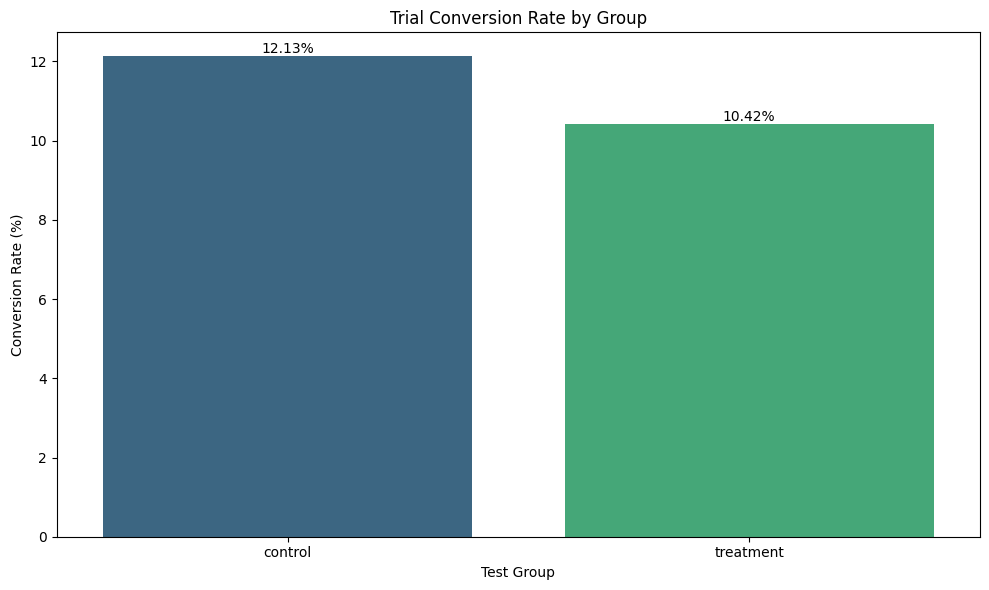

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Візуалізація відсотка конверсії пробного періоду
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=trial_conversion.index, y=trial_conversion.values, palette='viridis')
plt.title('Trial Conversion Rate by Group')
plt.ylabel('Conversion Rate (%)')
plt.xlabel('Test Group')


for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10)


plt.tight_layout()
plt.show()


<ipython-input-40-d0eff562e24a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(average_revenue.keys()), y=list(average_revenue.values()), palette='viridis')


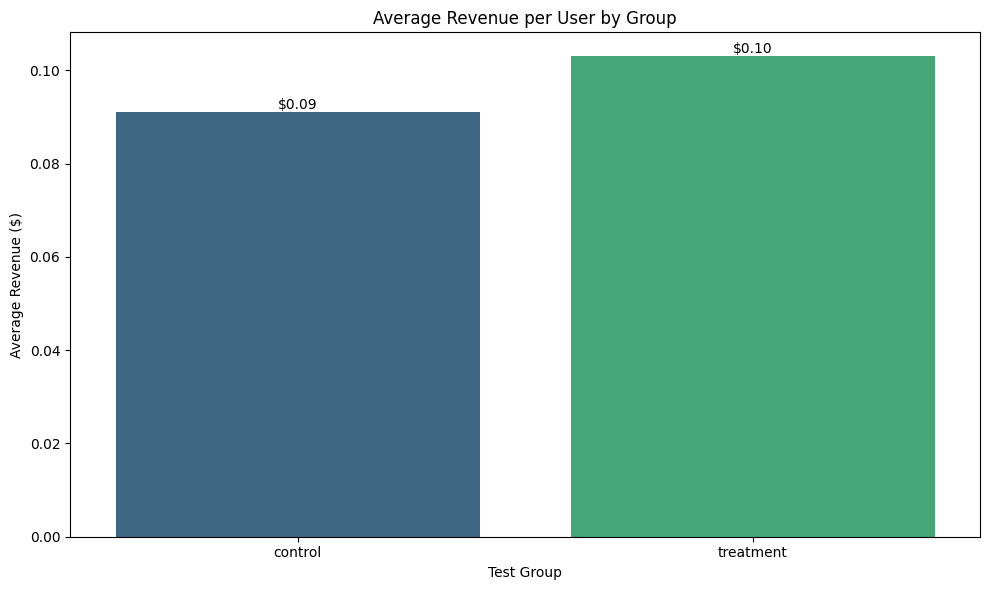

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Припустимо, у вас вже є дані для середнього доходу
average_revenue = {
    'control': 0.091,
    'treatment': 0.103
}

# Візуалізація середнього доходу на користувача
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=list(average_revenue.keys()), y=list(average_revenue.values()), palette='viridis')
plt.title('Average Revenue per User by Group')
plt.ylabel('Average Revenue ($)')
plt.xlabel('Test Group')

for p in ax.patches:
    ax.annotate(f'${p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()

# Збереження графіка
plt.savefig('my_revenue_plot.png', dpi=300, bbox_inches='tight')
plt.show()

# Завантаження графіка
from google.colab import files
files.download('my_revenue_plot.png')
